In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from kneed import KneeLocator

df = pd.read_csv("wine.csv")

# Separate the class column
original_classes = df['Type']
df = df.drop(columns=['Type'])

In [2]:
# Standardize the data
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df)

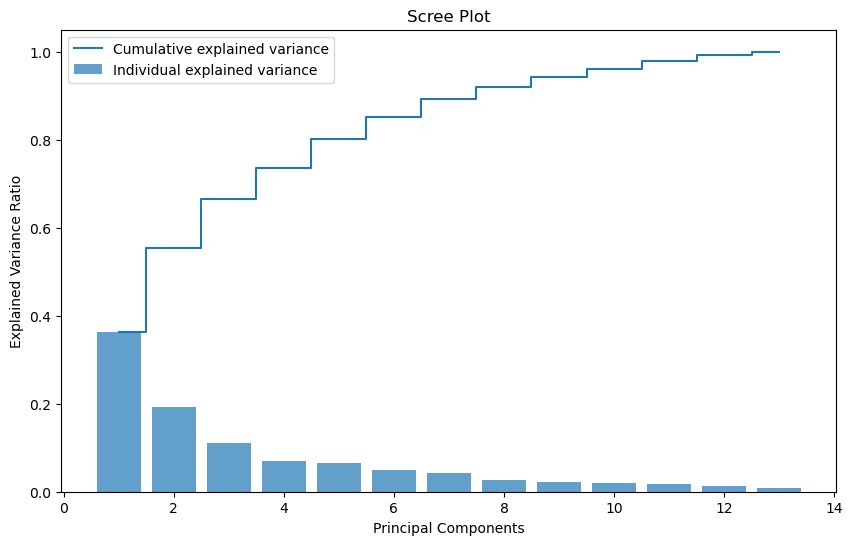

In [3]:
# Perform Principal Component Analysis (PCA)
pca = PCA()
pca_result = pca.fit_transform(df_standardized)

# Extract the first 3 principal components
pca_components = pca_result[:, :3]

# Scree plot to visualize explained variance by each principal component
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.legend()
plt.show()

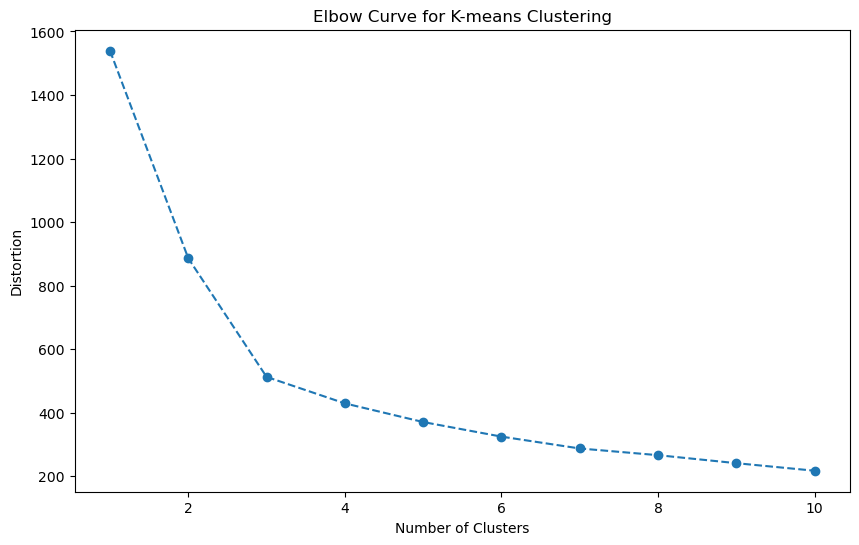

In [4]:
# Identify the optimal number of clusters using the elbow method for k-means

# Suppress KMeans memory leak warning on Windows with MKL
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")

distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(pca_components)
    distortions.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), distortions, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve for K-means Clustering')
plt.show()

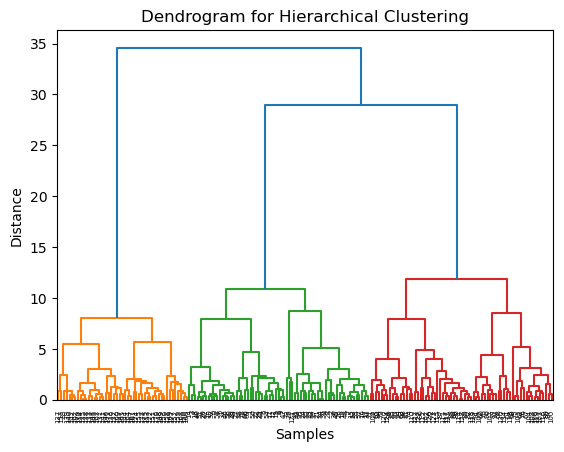

In [5]:
# Identify the optimal number of clusters using dendrogram for hierarchical clustering
linkage_matrix = linkage(pca_components, method='ward')
dendrogram(linkage_matrix)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [6]:
# Use KneeLocator to find the optimal number of clusters based on the elbow point
knee_locator = KneeLocator(range(1, 11), distortions, curve='convex', direction='decreasing')
optimal_k_kmeans = knee_locator.elbow

print(f"Elbow point : {optimal_k_kmeans}")

# Perform k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k_kmeans, n_init=10, random_state=42)
kmeans_clusters = kmeans.fit_predict(pca_components)

# Perform hierarchical clustering with the optimal number of clusters
hierarchical = AgglomerativeClustering(n_clusters=optimal_k_kmeans)
hierarchical_clusters = hierarchical.fit_predict(pca_components)

Elbow point : 3


In [7]:
num_clusters_hierarchical = len(np.unique(hierarchical_clusters[hierarchical_clusters != -1]))
num_clusters_kmeans = kmeans.n_clusters

print("Number of Clusters (Original Clustering):", original_classes.nunique())
print("Number of Clusters (Hierarchical Clustering):", num_clusters_hierarchical)
print("Number of Clusters (K-means Clustering):", num_clusters_kmeans)

Number of Clusters (Original Clustering): 3
Number of Clusters (Hierarchical Clustering): 3
Number of Clusters (K-means Clustering): 3


In [8]:
# Check if the clusters obtained using PCA match the original class column
comparison_df = pd.DataFrame({'Original': original_classes, 'KMeans': kmeans_clusters, 'Hierarchical': hierarchical_clusters})
print(comparison_df)

     Original  KMeans  Hierarchical
0           1       1             2
1           1       1             2
2           1       1             2
3           1       1             2
4           1       1             2
..        ...     ...           ...
173         3       0             1
174         3       0             1
175         3       0             1
176         3       0             1
177         3       0             1

[178 rows x 3 columns]
